In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR

# Simulated time series data
np.random.seed(0)
n = 100
t = np.arange(n)
data = 10 + 0.5 * t + np.random.normal(0, 1, n)

# Create a DataFrame
df = pd.DataFrame({'timestamp': pd.date_range(start='2022-01-01', periods=n, freq='D'),
                   'data': data})

df.head()

,timestamp,data
0,2022-01-01,11.764052
1,2022-01-02,10.900157
2,2022-01-03,11.978738
3,2022-01-04,13.740893
4,2022-01-05,13.867558


In [7]:
# 1. AutoRegressive (AR) Model
model_ar = AutoReg(df['data'], lags=1)
result_ar = model_ar.fit()
forecast_ar = result_ar.predict(start=n, end=n+10, dynamic=True)
list(forecast_ar)

[60.33380475615027,
 60.76469288257293,
 61.19465573389403,
 61.62369529701913,
 62.05181355458718,
 62.479012484979656,
 62.90529406232974,
 63.33066025653142,
 63.75511303324859,
 64.17865435392417,
 64.6012861757891]

In [13]:
# 2. Moving Average (MA) Model
model_ma = ARIMA(df['data'], order=(0, 0, 1))
result_ma = model_ma.fit()
forecast_ma = result_ma.predict(start=n, end=n+10)
list(forecast_ma)

[50.40286893415093,
 34.87665335568623,
 34.87665335568623,
 34.87665335568623,
 34.87665335568623,
 34.87665335568623,
 34.87665335568623,
 34.87665335568623,
 34.87665335568623,
 34.87665335568623,
 34.87665335568623]

In [15]:
# 3. AutoRegressive Integrated Moving Average (ARIMA) Model
model_arima = ARIMA(df['data'], order=(1, 1, 1))
result_arima = model_arima.fit()
forecast_arima = result_arima.forecast(steps=11)
list(forecast_arima)

[59.58675949657715,
 59.72687904669986,
 59.66459596254388,
 59.69228076861543,
 59.67997488335612,
 59.685444844446835,
 59.68301344892319,
 59.68409420326392,
 59.683613808390426,
 59.68382734372013,
 59.683732427351224]

In [16]:
# 4. Seasonal ARIMA (SARIMA) Model
model_sarima = SARIMAX(df['data'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
result_sarima = model_sarima.fit(disp=False)
forecast_sarima = result_sarima.forecast(steps=11)
list(forecast_sarima)

[61.06013671388045,
 60.64917261528752,
 61.47113108776044,
 61.89577291278253,
 62.29046553556588,
 63.23851931130722,
 63.93468639695325,
 64.56149746062951,
 64.2214147069239,
 65.03021017370345,
 65.47698406140634]

In [23]:

# 5. Vector AutoRegressive (VAR) Model
data_var = np.column_stack([df['data'], df['data'].shift(1)])
df_var = pd.DataFrame(data_var, columns=['data', 'data_lag1']).dropna()
model_var = VAR(df_var)
result_var = model_var.fit(maxlags=1)
forecast_var = result_var.forecast(df_var.values[-1:], steps=11)
list(forecast_var)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[array([60.24412841, 59.90198936]),
 array([60.81610662, 60.24412841]),
 array([61.2659788 , 60.81610662]),
 array([61.78063337, 61.2659788 ]),
 array([62.26082964, 61.78063337]),
 array([62.759266  , 62.26082964]),
 array([63.24795877, 62.759266  ]),
 array([63.74176773, 63.24795877]),
 array([64.23280211, 63.74176773]),
 array([64.72525204, 64.23280211]),
 array([65.21689249, 64.72525204])]

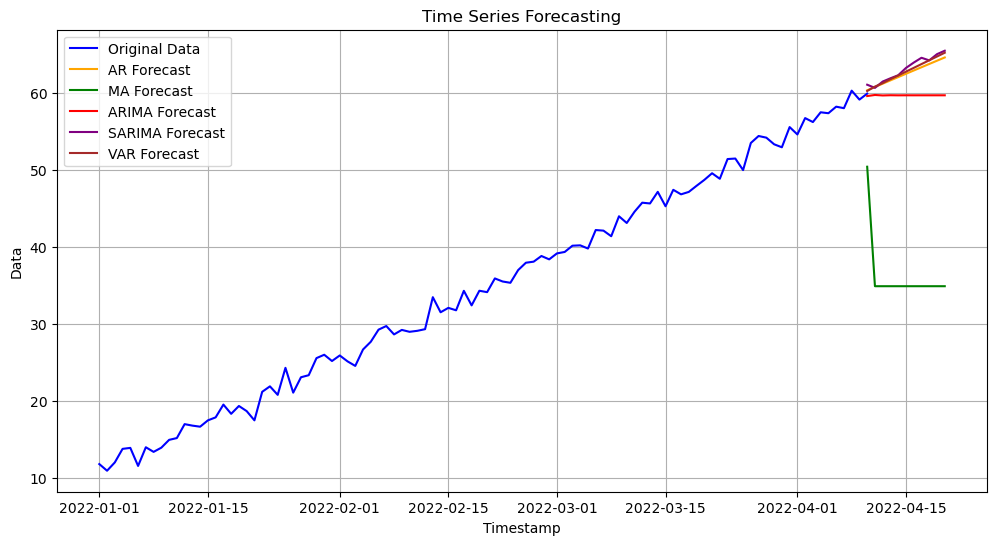

In [21]:
# Plotting the forecasts
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['data'], label='Original Data', color='blue')
plt.plot(pd.date_range(start=df['timestamp'].iloc[-1], periods=11, freq='D'), forecast_ar, label='AR Forecast', color='orange')
plt.plot(pd.date_range(start=df['timestamp'].iloc[-1], periods=11, freq='D'), forecast_ma, label='MA Forecast', color='green')
plt.plot(pd.date_range(start=df['timestamp'].iloc[-1], periods=11, freq='D'), forecast_arima, label='ARIMA Forecast', color='red')
plt.plot(pd.date_range(start=df['timestamp'].iloc[-1], periods=11, freq='D'), forecast_sarima, label='SARIMA Forecast', color='purple')
plt.plot(pd.date_range(start=df['timestamp'].iloc[-1], periods=11, freq='D'), forecast_var[:, 0], label='VAR Forecast', color='brown')
plt.xlabel('Timestamp')
plt.ylabel('Data')
plt.title('Time Series Forecasting')
plt.legend()
plt.grid(True)
plt.show()
